In [1]:
import cv2
import matplotlib.pyplot as plt
import math
import numpy as np

(1874, 2700)


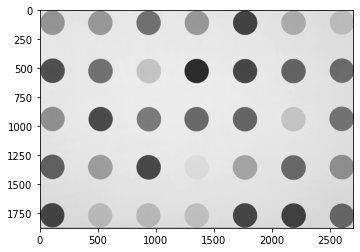

In [2]:
#p=input("enter path of cover image")
cover=cv2.imread('images/'+input(),0)
print(cover.shape)
plt.imshow(cover,cmap='gray')
plt.show()

(512, 512)


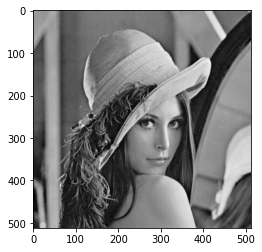

In [3]:
#msg=cv2.imread('images/GRAY_8BIT_100x100/'+input("enter path of message image"),0)
msg=cv2.imread('images/'+input("enter path of message image"),0)
print(msg.shape)
plt.imshow(msg,cmap='gray')
plt.show()
#4.1.05.tiff

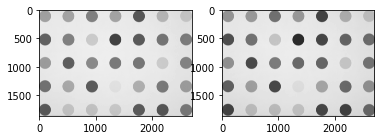

In [4]:
def maxc(i,j):
    if i>j:
        return i
    return j
def minc(i,j):
    if i<j:
        return i
    return j
def stego_pvd_encode(cover,msg):
    cover1d=cover.flatten()
    msg1d=msg.flatten()
    byt_str=''
    for i in range(msg1d.shape[0]):
        byt_str+=format(int(msg1d[i]),'08b')
    mtb=0
    n=len(byt_str)
    i=0
    while mtb<n:
        if cover1d[i]>cover1d[i+1]:
            diff=cover1d[i]-cover1d[i+1]
        else:
            diff=cover1d[i+1]-cover1d[i]
        #print('co',cover1d[i],cover1d[i+1],diff)
        if diff>=0 and diff<8:
            bits=2
            low=0
        elif diff>=8 and diff<16:
            bits=3
            low=8
        elif diff>=16 and diff<32:
            bits=4
            low=16
        elif diff>=32 and diff<64:
            bits=5
            low=32
        elif diff>=64 and diff<128:
            bits=6
            low=64
        elif diff>=128 and diff<256:
            bits=7
            low=128
        ac_diff=(int(byt_str[mtb:mtb+bits],2)+low)-diff
        mtb+=bits
        half=ac_diff//2
        mx=maxc(cover1d[i],cover1d[i+1])
        mn=minc(cover1d[i],cover1d[i+1])
        if mx+half<=255:
            mx+=half
        else:
            half=255-mx
            mx=255
        if mn-(ac_diff-half)>=0:
            mn-=(ac_diff-half)
        else:
            mx+=(half-mn)
            mn=0
        if cover1d[i]>cover1d[i+1]:
            cover1d[i]=mx
            cover1d[i+1]=mn
        else:
            cover1d[i+1]=mx
            cover1d[i]=mn
        i+=2
    return cover1d.reshape(cover.shape[0],cover.shape[1])

cover_stego_pvd=stego_pvd_encode(cover,msg)
plt.subplot(1,2,1)
plt.imshow(cover_stego_pvd,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(cover,cmap='gray')
plt.show()


In [5]:
from skimage import metrics
print('MSE =',metrics.mean_squared_error(cover,cover_stego_pvd))
print('PSNR =',metrics.peak_signal_noise_ratio(cover,cover_stego_pvd))
print('SSIM =',metrics.structural_similarity(cover,cover_stego_pvd))

MSE = 0.7589831613897783
PSNR = 49.32848220014094
SSIM = 0.995225029126168


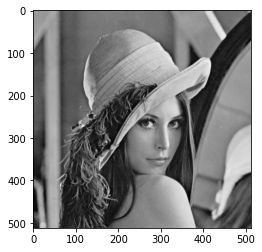

In [7]:
def stego_pvd_decode(stego,dim):
    stego1d=stego.flatten()
    n=dim[0]*dim[1]*8
    mtb=0
    i=0
    byt_str=''
    while mtb<n:
        if stego1d[i]>stego1d[i+1]:
            diff=stego1d[i]-stego1d[i+1]
        else:
            diff=stego1d[i+1]-stego1d[i]
        i+=2
        if diff>=0 and diff<8:
            bits=2
            low=0
        elif diff>=8 and diff<16:
            bits=3
            low=8
        elif diff>=16 and diff<32:
            bits=4
            low=16
        elif diff>=32 and diff<64:
            bits=5
            low=32
        elif diff>=64 and diff<128:
            bits=6
            low=64
        elif diff>=128 and diff<256:
            bits=7
            low=128
        val=diff-low
        byt_str+=format(int(val),'0'+str(bits)+'b')
        mtb+=bits
    mtb=0
    msg_rec=[]
    while mtb<n:
        msg_rec.append(int(byt_str[mtb:mtb+8],2))
        mtb+=8
    return np.array(msg_rec).reshape(dim[0],dim[1])
msg_rec_pvd=stego_pvd_decode(cover_stego_pvd,msg.shape)
plt.imshow(msg_rec_pvd,cmap='gray')
plt.show()